<h3 style= "color:blue;"> Importing all the necessary libraries before begining </h3>

In [ ]:
# import required libraries

import pandas as pd # dataframes
import numpy as np #mathematical operations

# to visualise

import plotly.express as px # plotly
from wordcloud import WordCloud # wordclouds
import matplotlib.pyplot as plt #matplot
import seaborn as sns #seaborn

# preprocessing

import re #Regular expressions
import nltk #NLP library
import string
from bs4 import BeautifulSoup #HTML tags
from nltk.corpus import stopwords #english stopwords
#lematising
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


<h3 style= "color:blue;"> Importing Data Set </h3>

In [66]:
# landing google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# load your dataframe
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Research/Data Frames/document-dataset.csv")

<h3 style= "color:blue;"> Have a look </h3>

In [68]:
#observing data frame
df.head()

,fileclass,content
0,ChildProtection,TRENDS IN ONLINE CHILD SEXUAL ABUSE MATERIAL1\...
1,ChildProtection,COVID-19: DIGITAL AND REMOTE \nAPPROACHES IN E...
2,ChildProtection,\nJournal Pre-proof\nDigital media use and su...
3,ChildProtection,OrigiNAL Ar TiCLE\nsexual Exploitation and Abu...
4,ChildProtection,COVID-19 and its implications \nfor protecting...


<h3> Data types </h3>

In [69]:
#data types
df.dtypes

fileclass    object
content      object
dtype: object

In [70]:
# change both types into string
df['content'] = df['content'].astype('str')
df['fileclass'] = df['fileclass'].astype('str')

<h3> Size </h3>

In [71]:
# size of the data frame
df.size

1702

In [72]:
# spread of the data frame
print("No. of text files: ",df.shape[0])

No. of text files:  851


In [73]:
# Define a dictionary to map old values to new values
class_mapping = {'ChildProtection': 'Child Protection', 'Cybersecurity': 'Cybersecurity', 'DataPrivacy': 'Data Privacy',
                 'DataSystemsDevelopment': 'Data Systems & development', 'DigitalFinance': 'Digital Finance', 'DigitalInclusion': 'Digital Inclusion',
                 'DigitalInformatioServices': 'Digital Information Services', 'DigitalInfrastructure': 'Digital Infrastructure Development', 'DigitalLiteracy': 'Digital Literacy',
                 'DigitalServices': 'Policy & regulation or Digital Services', 'Egovernment': 'E-government', 'Upskilling': 'Upskilling/Capacity Building'}

# Replace values in the 'fileclass' column using the dictionary
df['fileclass'].replace(class_mapping, inplace=True)


In [74]:
df.head()

,fileclass,content
0,Child Protection,TRENDS IN ONLINE CHILD SEXUAL ABUSE MATERIAL1\...
1,Child Protection,COVID-19: DIGITAL AND REMOTE \nAPPROACHES IN E...
2,Child Protection,\nJournal Pre-proof\nDigital media use and su...
3,Child Protection,OrigiNAL Ar TiCLE\nsexual Exploitation and Abu...
4,Child Protection,COVID-19 and its implications \nfor protecting...


<h3> Spread of text files based on intervention areas </h3>

In [75]:
# Count the number of items per group
group_counts = df['fileclass'].value_counts().reset_index()
group_counts.columns = ['fileclass', 'count']

# Create the pie chart
fig = px.pie(group_counts, names='fileclass', values='count', hover_data=['fileclass', 'count'])

fig.update_traces(textposition='inside', textinfo='percent+label')


# Show the chart
fig.show()

In [ ]:
# Count the number of items per group
group_counts = df.groupby("fileclass").count()
group_counts=group_counts.reset_index()

# Create the bar chart
fig = px.bar(group_counts, x='fileclass', y='content',color="fileclass")

# Show the chart
fig.show()

<h3 style= "color:blue;"> Data Preprocessing </h3>

<h3> Treat duplicates </h3>

Which means there are duplicates at the moment.

In [76]:
# remove duplicates, leaving the first record
df = df.drop_duplicates(subset=['content'],keep="first")

In [77]:
# spread of the data frame after remocing duplicates
print("No. of text files: ",df.shape[0])

No. of text files:  615


In [ ]:
# word cloud to check the overall spread of words

all_words = ''

# to extract most common words
for arg in df["content"]:

    tokens = arg.split()

    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.title("Wordcloud before preprocessing")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<h3 style= "color:blue;"> Data Cleaning </h3>

<h3> Lowercasing </h3>

In [ ]:
df["content"] = df["content"].str.lower()
df.content.iloc[42]

'big data, not big brother: \nnew data protection laws and the implications \nfor independent media around the world\nayden férdeline\njune 2019big data, not big brother:\nnew data protection laws and the implications \nfor independent media around the world\njune 2019\nabout cima\nthe center for international media \nassistance (cima),  at the national \nendowment for democracy, works \nto strengthen the support, raise the \nvisibility, and improve the effectiveness of \nindependent media development throughout \nthe world. the center provides information, \nbuilds networks, conducts research, \nand highlights the indispensable role \nindependent media play in the creation and \ndevelopment of sustainable democracies. \nan important aspect of cima’s work is \nto research ways to attract additional us \nprivate sector interest in and support for \ninternational media development.\ncima convenes working groups, discussions, \nand panels on a variety of topics in the \nfield of media dev

<h3> Remove URLS </h3>

In [45]:
df['content'] = df['content'].astype('str')
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_urls(text))

df.content.iloc[42]

'big data, not big brother: \nnew data protection laws and the implications \nfor independent media around the world\nayden férdeline\njune 2019big data, not big brother:\nnew data protection laws and the implications \nfor independent media around the world\njune 2019\nabout cima\nthe center for international media \nassistance (cima),  at the national \nendowment for democracy, works \nto strengthen the support, raise the \nvisibility, and improve the effectiveness of \nindependent media development throughout \nthe world. the center provides information, \nbuilds networks, conducts research, \nand highlights the indispensable role \nindependent media play in the creation and \ndevelopment of sustainable democracies. \nan important aspect of cima’s work is \nto research ways to attract additional us \nprivate sector interest in and support for \ninternational media development.\ncima convenes working groups, discussions, \nand panels on a variety of topics in the \nfield of media dev

<h3> Remove HTML tags </h3>

In [46]:
def remove_html(text):
    return BeautifulSoup(text, "lxml").text

df["content"] = df["content"].apply(lambda text: remove_html(text))

df.content.iloc[42]

'big data, not big brother: \nnew data protection laws and the implications \nfor independent media around the world\nayden férdeline\njune 2019big data, not big brother:\nnew data protection laws and the implications \nfor independent media around the world\njune 2019\nabout cima\nthe center for international media \nassistance (cima),  at the national \nendowment for democracy, works \nto strengthen the support, raise the \nvisibility, and improve the effectiveness of \nindependent media development throughout \nthe world. the center provides information, \nbuilds networks, conducts research, \nand highlights the indispensable role \nindependent media play in the creation and \ndevelopment of sustainable democracies. \nan important aspect of cima’s work is \nto research ways to attract additional us \nprivate sector interest in and support for \ninternational media development.\ncima convenes working groups, discussions, \nand panels on a variety of topics in the \nfield of media dev

<h3> Remove emails </h3>

In [47]:
def remove_emails(text):
    email_pattern = re.compile(r'\S+@\S+')
    return email_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_emails(text))
df.content.iloc[42]

'big data, not big brother: \nnew data protection laws and the implications \nfor independent media around the world\nayden férdeline\njune 2019big data, not big brother:\nnew data protection laws and the implications \nfor independent media around the world\njune 2019\nabout cima\nthe center for international media \nassistance (cima),  at the national \nendowment for democracy, works \nto strengthen the support, raise the \nvisibility, and improve the effectiveness of \nindependent media development throughout \nthe world. the center provides information, \nbuilds networks, conducts research, \nand highlights the indispensable role \nindependent media play in the creation and \ndevelopment of sustainable democracies. \nan important aspect of cima’s work is \nto research ways to attract additional us \nprivate sector interest in and support for \ninternational media development.\ncima convenes working groups, discussions, \nand panels on a variety of topics in the \nfield of media dev

<h3> Remove stopwords </h3>

In [51]:
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

# read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["content"] = df["content"].apply(lambda text: remove_stopwords(text))


df.content.iloc[42]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'big data, big brother: data protection laws implications independent media ayden férdeline june 2019big data, big brother: data protection laws implications independent media june 2019 cima center international media assistance (cima), national endowment democracy, works strengthen support, raise visibility, improve effectiveness independent media development world. center information, builds networks, conducts research, highlights indispensable role independent media play creation development sustainable democracies. aspect cima’s ways attract additional private sector support international media development. cima convenes working groups, discussions, panels variety topics field media development assistance. center issues reports recommendations working discussions investigations. reports aim policymakers, donors practitioners, ideas bolstering effectiveness media assistance. center international media assistance national endowment democracy 1025 street, n.w., 8th floor washington, d

<h3> Remove punctuations </h3>

In [52]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df["content"] = df["content"].apply(lambda text: remove_punctuation(text))
df.content.iloc[42]

'big data big brother data protection laws implications independent media ayden férdeline june 2019big data big brother data protection laws implications independent media june 2019 cima center international media assistance cima national endowment democracy works strengthen support raise visibility improve effectiveness independent media development world center information builds networks conducts research highlights indispensable role independent media play creation development sustainable democracies aspect cima’s ways attract additional private sector support international media development cima convenes working groups discussions panels variety topics field media development assistance center issues reports recommendations working discussions investigations reports aim policymakers donors practitioners ideas bolstering effectiveness media assistance center international media assistance national endowment democracy 1025 street nw 8th floor washington dc 20004 phone 202 3789700 fa

<h3> Remove numbers </h3>

In [53]:
def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_numbers(text))
df.content.iloc[42]

'big data big brother data protection laws implications independent media ayden férdeline june big data big brother data protection laws implications independent media june  cima center international media assistance cima national endowment democracy works strengthen support raise visibility improve effectiveness independent media development world center information builds networks conducts research highlights indispensable role independent media play creation development sustainable democracies aspect cima’s ways attract additional private sector support international media development cima convenes working groups discussions panels variety topics field media development assistance center issues reports recommendations working discussions investigations reports aim policymakers donors practitioners ideas bolstering effectiveness media assistance center international media assistance national endowment democracy  street nw th floor washington dc  phone   fax   email url mark nelson se

<h3> Remove non alphabetic characters </h3>

In [54]:
def remove_non_alpha(text):
    non_alpha_pattern = re.compile(r'[^a-zA-Z\s]')
    return non_alpha_pattern.sub(r'', text)

df["content"] = df["content"].apply(lambda text: remove_non_alpha(text))

<h3> Remove extra whitespaces </h3>

In [55]:
def remove_extra_whitespaces(text):
    whitespace_pattern = re.compile(r'\s+')
    return whitespace_pattern.sub(' ', text)

df["content"] = df["content"].apply(lambda text: remove_extra_whitespaces(text))
df.content.iloc[42]

'big data big brother data protection laws implications independent media ayden frdeline june big data big brother data protection laws implications independent media june cima center international media assistance cima national endowment democracy works strengthen support raise visibility improve effectiveness independent media development world center information builds networks conducts research highlights indispensable role independent media play creation development sustainable democracies aspect cimas ways attract additional private sector support international media development cima convenes working groups discussions panels variety topics field media development assistance center issues reports recommendations working discussions investigations reports aim policymakers donors practitioners ideas bolstering effectiveness media assistance center international media assistance national endowment democracy street nw th floor washington dc phone fax email url mark nelson senior dire

<h3> Remove single letters</h3>

In [56]:
def remove_single_letter_words(text):
    return " ".join([word for word in str(text).split() if len(word) > 1])

df["content"] = df["content"].apply(lambda text: remove_single_letter_words(text))
df.content.iloc[42]

'big data big brother data protection laws implications independent media ayden frdeline june big data big brother data protection laws implications independent media june cima center international media assistance cima national endowment democracy works strengthen support raise visibility improve effectiveness independent media development world center information builds networks conducts research highlights indispensable role independent media play creation development sustainable democracies aspect cimas ways attract additional private sector support international media development cima convenes working groups discussions panels variety topics field media development assistance center issues reports recommendations working discussions investigations reports aim policymakers donors practitioners ideas bolstering effectiveness media assistance center international media assistance national endowment democracy street nw th floor washington dc phone fax email url mark nelson senior dire

<h3> Lemmatisation </h3>

In [57]:
import spacy

In [58]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["content"] = df["content"].apply(lambda text: lemmatize_words(text))
df.content.iloc[42]

'big data big brother data protection law implication independent medium ayden frdeline june big data big brother data protection law implication independent medium june cima center international medium assistance cima national endowment democracy work strengthen support raise visibility improve effectiveness independent medium development world center information build network conduct research highlight indispensable role independent medium play creation development sustainable democracy aspect cimas way attract additional private sector support international medium development cima convenes work group discussion panel variety topic field medium development assistance center issue report recommendation work discussion investigation report aim policymakers donor practitioner idea bolster effectiveness medium assistance center international medium assistance national endowment democracy street nw th floor washington dc phone fax email url mark nelson senior director nicholas benequista 

In [59]:
# remove stopwords once again to get rid of any
STOPWORDS = set(stopwords.words('english'))

# read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())

# add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["content"] = df["content"].apply(lambda text: remove_stopwords(text))
df.content.iloc[42]

'big data big brother data protection law implication independent medium ayden frdeline june big data big brother data protection law implication independent medium june cima center international medium assistance cima national endowment democracy strengthen support raise visibility improve effectiveness independent medium development center build network conduct highlight indispensable role independent medium play creation development sustainable democracy aspect cimas attract additional private sector support international medium development cima convenes discussion panel variety topic field medium development assistance center issue recommendation discussion investigation aim policymakers donor practitioner idea bolster effectiveness medium assistance center international medium assistance national endowment democracy street nw floor washington dc phone fax email url mark nelson senior director nicholas benequista manage editor daniel omaley publication editorabout author ayden frde

<h3> Treatment for frequent and rare words </h3>

In [ ]:
# check most frequent words

from collections import Counter
cnt = Counter()
for text in df["content"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(16)

In [61]:
# remove most frequent words
FREQWORDS = set([w for (w, wc) in cnt.most_common(15)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["content"] = df["content"].apply(lambda text: remove_freqwords(text))

In [ ]:
# check rare words
cnt = Counter()
for text in df["content"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common()[-166000:]

In [63]:
# remove rare words where the occurance is less than or equal to 10
rare_words = set([w for (w,wc) in cnt.most_common()[-165995:]])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in rare_words])

df["content"] = df["content"].apply(lambda text: remove_rarewords(text))

In [64]:
df.content.iloc[67]

'author martin manage director editor international policy director cyber policy center threat discrimination march question privacy explode scandal unknown consult company cambridge analytica lawmaker grapple update law counter harm big ai spring covid pandemic brought question sufficient legal protection public debate urgent warning privacy implication contact trace apps surveillance consequence pandemic aftermath big app transport education office turn vast surveillance network individual tradeoff privacy sacrifice allege benefit john thornhill klein collective nature big people impacted people climate change threat societal personal point collective nature big people impacted people climate change threat societal personal era big ai people suffer sum individual analyse algorithms novel form collective datadriven harm appear result housing job credit ad discriminate basis race gender woman job basis gender foreign actor pull farright public debate law deal collective oppose individu

**This is the final function for pre processing. Will be used in user case:**

In [ ]:
# function to remove URLs
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

# function to remove HTML tags
def remove_html(text):
    return BeautifulSoup(text, "lxml").text

# function to remove emails
def remove_emails(text):
    email_pattern = re.compile(r'\S+@\S+')
    return email_pattern.sub(r'', text)

# removing stopwords
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))
# read in custom stopwords list from text file
with open('/content/drive/MyDrive/Colab Notebooks/Research/Stoplist.txt', 'r') as file:
    custom_stopwords = set(file.read().split())
# add custom stopwords to the existing STOPWORDS set
STOPWORDS = STOPWORDS.union(custom_stopwords)
# function to remove stopwords
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# function to remove punctuations
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# function to remove numbers
def remove_numbers(text):
    number_pattern = re.compile(r'\d+')
    return number_pattern.sub(r'', text)


In [ ]:
# function to remove non alphabetical characters
def remove_non_alpha(text):
    non_alpha_pattern = re.compile(r'[^a-zA-Z\s]')
    return non_alpha_pattern.sub(r'', text)

# function to remove extra white space
def remove_extra_whitespaces(text):
    whitespace_pattern = re.compile(r'\s+')
    return whitespace_pattern.sub(' ', text)

#f frunction to remove single letters
def remove_single_letter_words(text):
    return " ".join([word for word in str(text).split() if len(word) > 1])

# funtion to lemmatise
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word,
                     pos in pos_tagged_text])

# final function
def preprocess(text):
  text=text.lower()
  text=remove_urls(text)
  text=remove_html(text)
  text=remove_emails(text)
  text=remove_stopwords(text)
  text=remove_punctuation(text)
  text=remove_numbers(text)
  text=remove_non_alpha(text)
  text=remove_extra_whitespaces(text)
  text=remove_single_letter_words(text)
  text=lemmatize_words(text)
  text=remove_stopwords(text) # once again removing stopwords
  return text

df["content"] = df["content"].apply(lambda text: preprocess(text))

In [ ]:
# final function
def preprocess(text):
  text=text.lower()
  text=remove_urls(text)
  text=remove_html(text)
  text=remove_emails(text)
  text=remove_stopwords(text)
  text=remove_punctuation(text)
  text=remove_numbers(text)
  text=remove_non_alpha(text)
  text=remove_extra_whitespaces(text)
  text=remove_single_letter_words(text)
  text=lemmatize_words(text)
  text=remove_stopwords(text) # once again removing stopwords
  return text

df["content"] = df["content"].apply(lambda text: preprocess(text))

<h3 style= "color:blue;"> EDA </h3>

<h3> Word Cloud </h3>

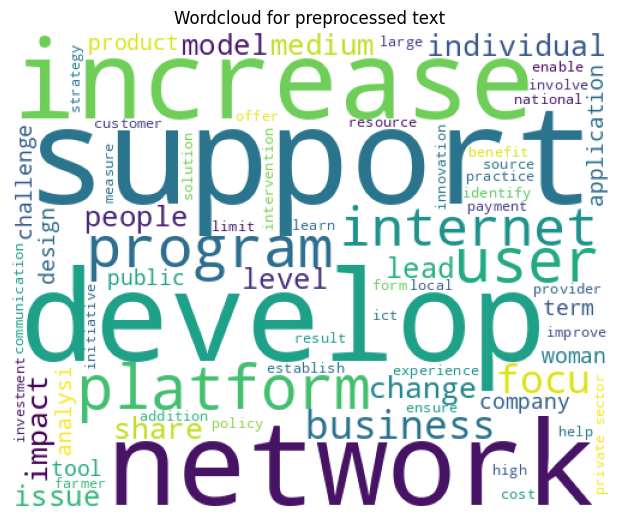

In [65]:
# word cloud to check the overall spread of words

all_words = ''

# to extract most common words
for arg in df["content"]:

    tokens = arg.split()

    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 400,
                background_color ='white',
                min_font_size = 10).generate(all_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.title("Wordcloud for preprocessed text")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

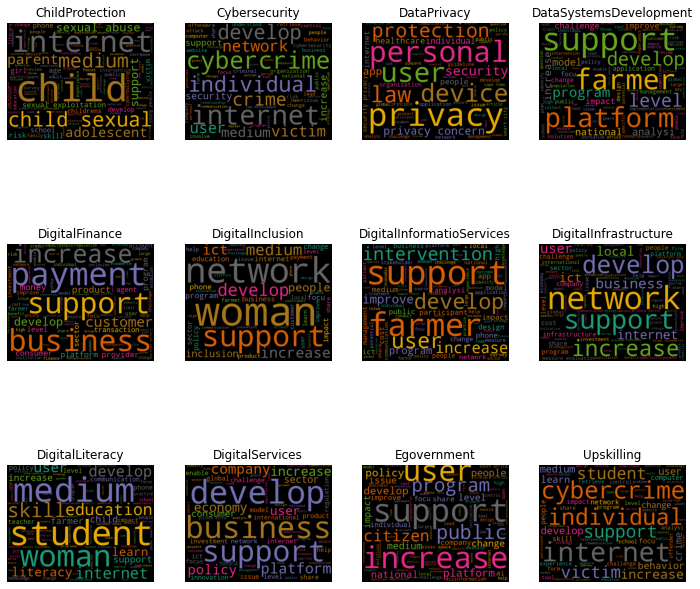

In [ ]:
# word clouds based on intervention areas

# Get all the unique classes in the dataset
classes = df['fileclass'].unique()

# Create a figure with 4 subplots
fig, axs = plt.subplots(3, 4, figsize=(10, 10))
axs = axs.ravel()

# Iterate through each class
for i, class_name in enumerate(classes):
    # Get all the text for the current class
    class_text = df[df['fileclass'] == class_name]['content'].str.cat(sep=' ')
    # Generate the wordcloud
    wordcloud = WordCloud(width = 500, height = 400,
                colormap="Dark2",
                min_font_size = 10).generate(class_text)
    # Plot the wordcloud
    axs[i].imshow(wordcloud)
    axs[i].set_title(f"{class_name}")
    axs[i].axis("off")
fig.tight_layout()
plt.show()

In [ ]:
filename = 'preprocessed.csv'
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Research' + filename)